In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import dftbpp as tb

In [2]:
coords = tb.getcoords('tdcoords.xyz')
coords.centercoords()

In [128]:
time = coords.time

In [3]:
r0 = [coords.radius(i,0) for i in range(coords.natoms)]

In [6]:
surfatoms = []
for i,r in enumerate(r0):
    if r > 6.9:
        surfatoms.append(i)

In [8]:
len(surfatoms)

92

In [31]:
def rad_esferas(self, surfatoms):
    """ Calcula el radio vs t de la esfera más chica capaz de contener a la nanopartícula (radext),
        sacado de dftbpp.py,
        y el radio vs t de la esfera más grande contenida por los átomos superficiales (radint)"""
    r = np.sqrt((self.x - self.x[0,:])**2 + (self.y - self.y[0,:])**2 + (self.z - self.z[0,:])**2)
    rsurfall = np.array([r[i,:] for i in surfatoms])
    radext = abs(r).max(axis=0)
    radint = rsurfall.min(axis=0)
    return radext, radint

In [37]:
radext, radint = rad_esferas(coords, surfatoms)
rave = 0.5*(radext+radint)

# Radio de esfera contenedora (externa)

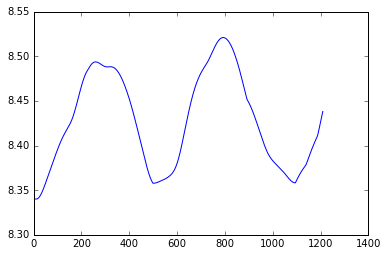

In [39]:
plt.plot(time, radext)

# Radio promedio de esfera contenedora y esfera contenida 

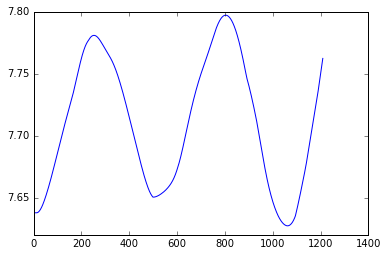

In [38]:
plt.plot(time, rave)

In [47]:
dist = np.zeros((coords.natoms, coords.natoms, coords.nframes))
for i in range(coords.natoms):
    for j in range(coords.natoms):
        dist[i,j,:] = np.sqrt((coords.x[i,:] - coords.x[j,:])**2 + 
                              (coords.y[i,:] - coords.y[j,:])**2 + 
                              (coords.z[i,:] - coords.z[j,:])**2)

In [59]:
dist[0,:,0].sort()

In [127]:
radatoms = []
for ti in range(coords.nframes):
    ave = 0.0
    neighs = 0
    for i in range(coords.natoms):
        dist[i,:,ti].sort()
        for j in range(1,coords.natoms):
            if abs(dist[i,j,ti]-dist[i,1,ti]) < 0.2:
                neighs += 1
                ave += dist[i,j,ti]
    radatoms.append(ave/neighs)

# Radio atómico calculado como el promedio con todos los vecinos

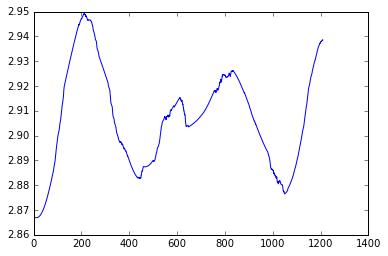

In [129]:
plt.plot(time,radatoms)